In [193]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA

In [194]:
# load data

train_path = r'../data/train.csv'
test_path = r'../data/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# DATA PREPROCESSING
- 데이터 탐색
- 결측치 확인
- 이상치 확인


In [195]:
train_df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [196]:
test_df.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [197]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [198]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


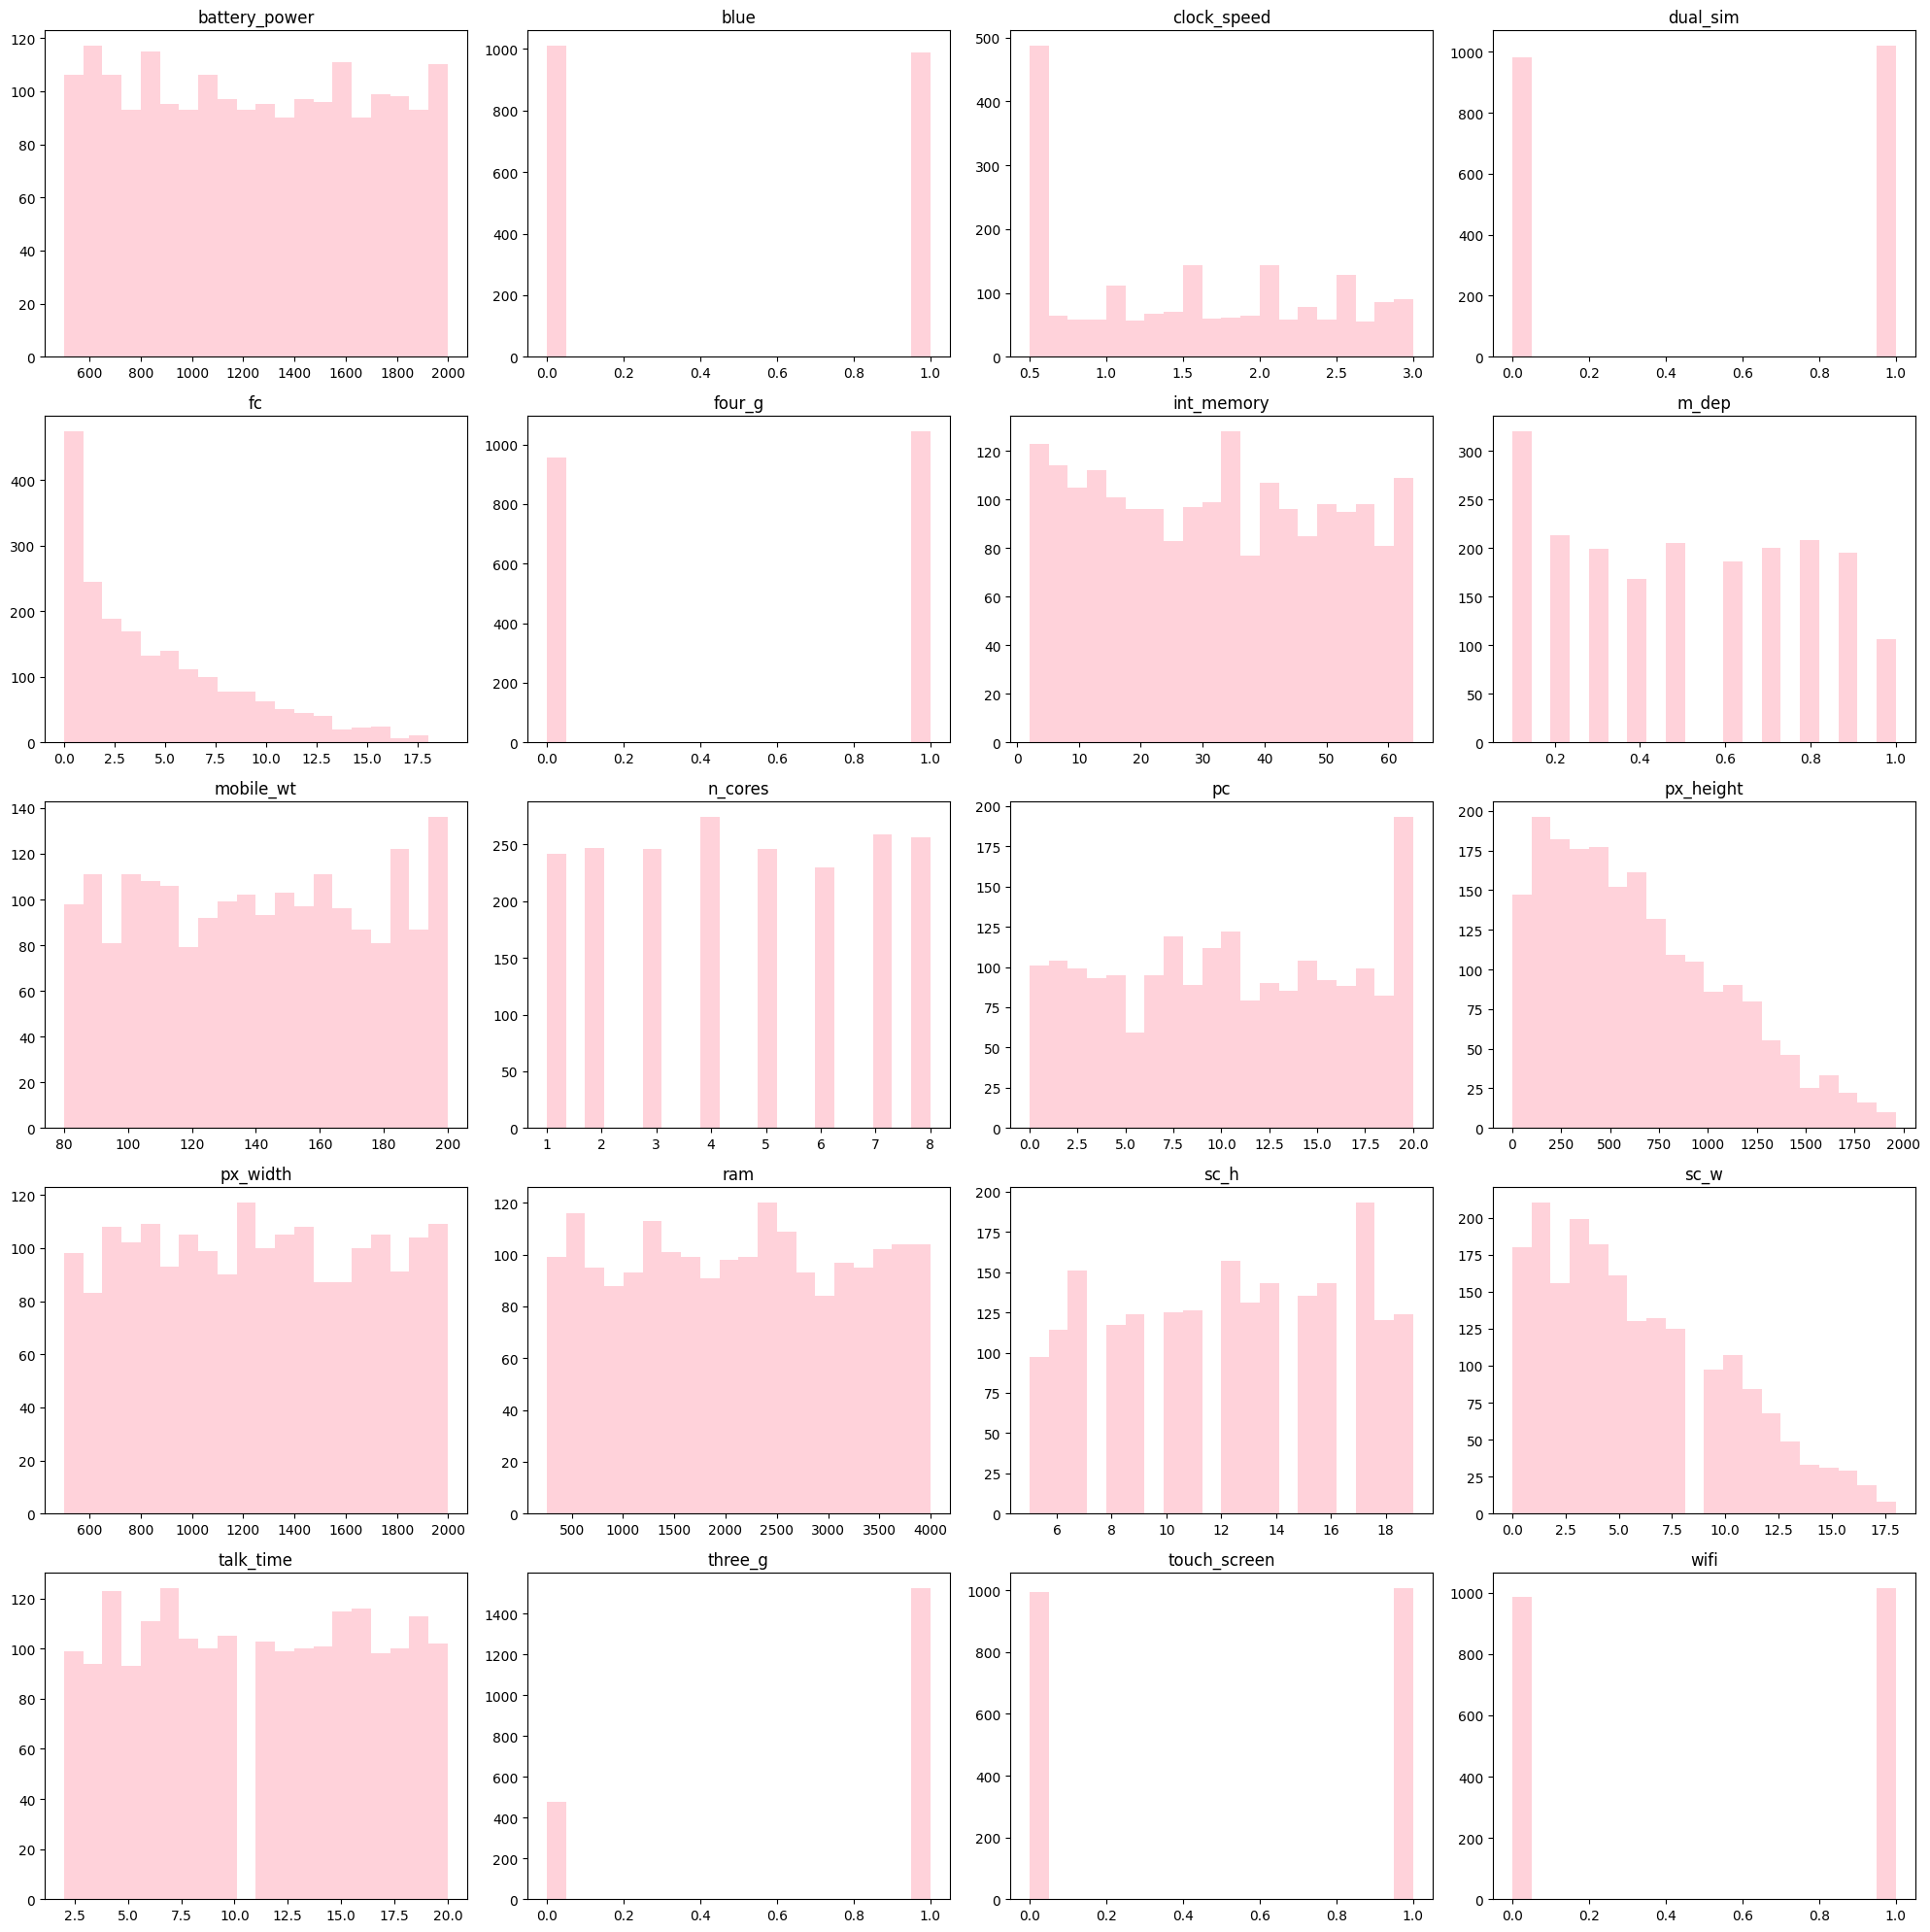

In [199]:
fig, axes = plt.subplots(nrows = 5, ncols = 4, figsize = (20, 20))
axes = axes.flatten()

for i in range(len(train_df.columns)-1):
    axes[i].hist(train_df.iloc[:, i], bins = 20, color = 'pink', alpha = 0.7)
    axes[i].set_title(train_df.columns[i])

plt.tight_layout()
plt.show()

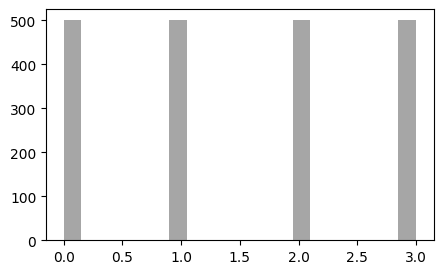

In [200]:
plt.figure(figsize = (5, 3))

plt.hist(train_df.iloc[:, -1], color = 'grey', bins = 20, alpha = 0.7)

plt.show()

In [201]:
train_df.iloc[:, -1].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [202]:
print(train_df.loc[:, 'three_g'].value_counts())
print(train_df.loc[:, 'three_g'].value_counts() / len(train_df))

three_g
1    1523
0     477
Name: count, dtype: int64
three_g
1    0.7615
0    0.2385
Name: count, dtype: float64


In [203]:
print(1523/477)

3.192872117400419


In [204]:
m_deps_unique = train_df.loc[:, 'm_dep'].unique()
sorted(m_deps_unique)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [205]:
train_df.loc[:, 'm_dep'].value_counts()

m_dep
0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: count, dtype: int64

In [206]:
n_cores_unique = train_df.loc[:, 'n_cores'].unique()
sorted(n_cores_unique)

[1, 2, 3, 4, 5, 6, 7, 8]

In [207]:
train_df.loc[:, 'n_cores'].value_counts()

n_cores
4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: count, dtype: int64

In [208]:
train_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [209]:
discrete_columns = ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']
continues_columns = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 
                     'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# VISUALIZATION

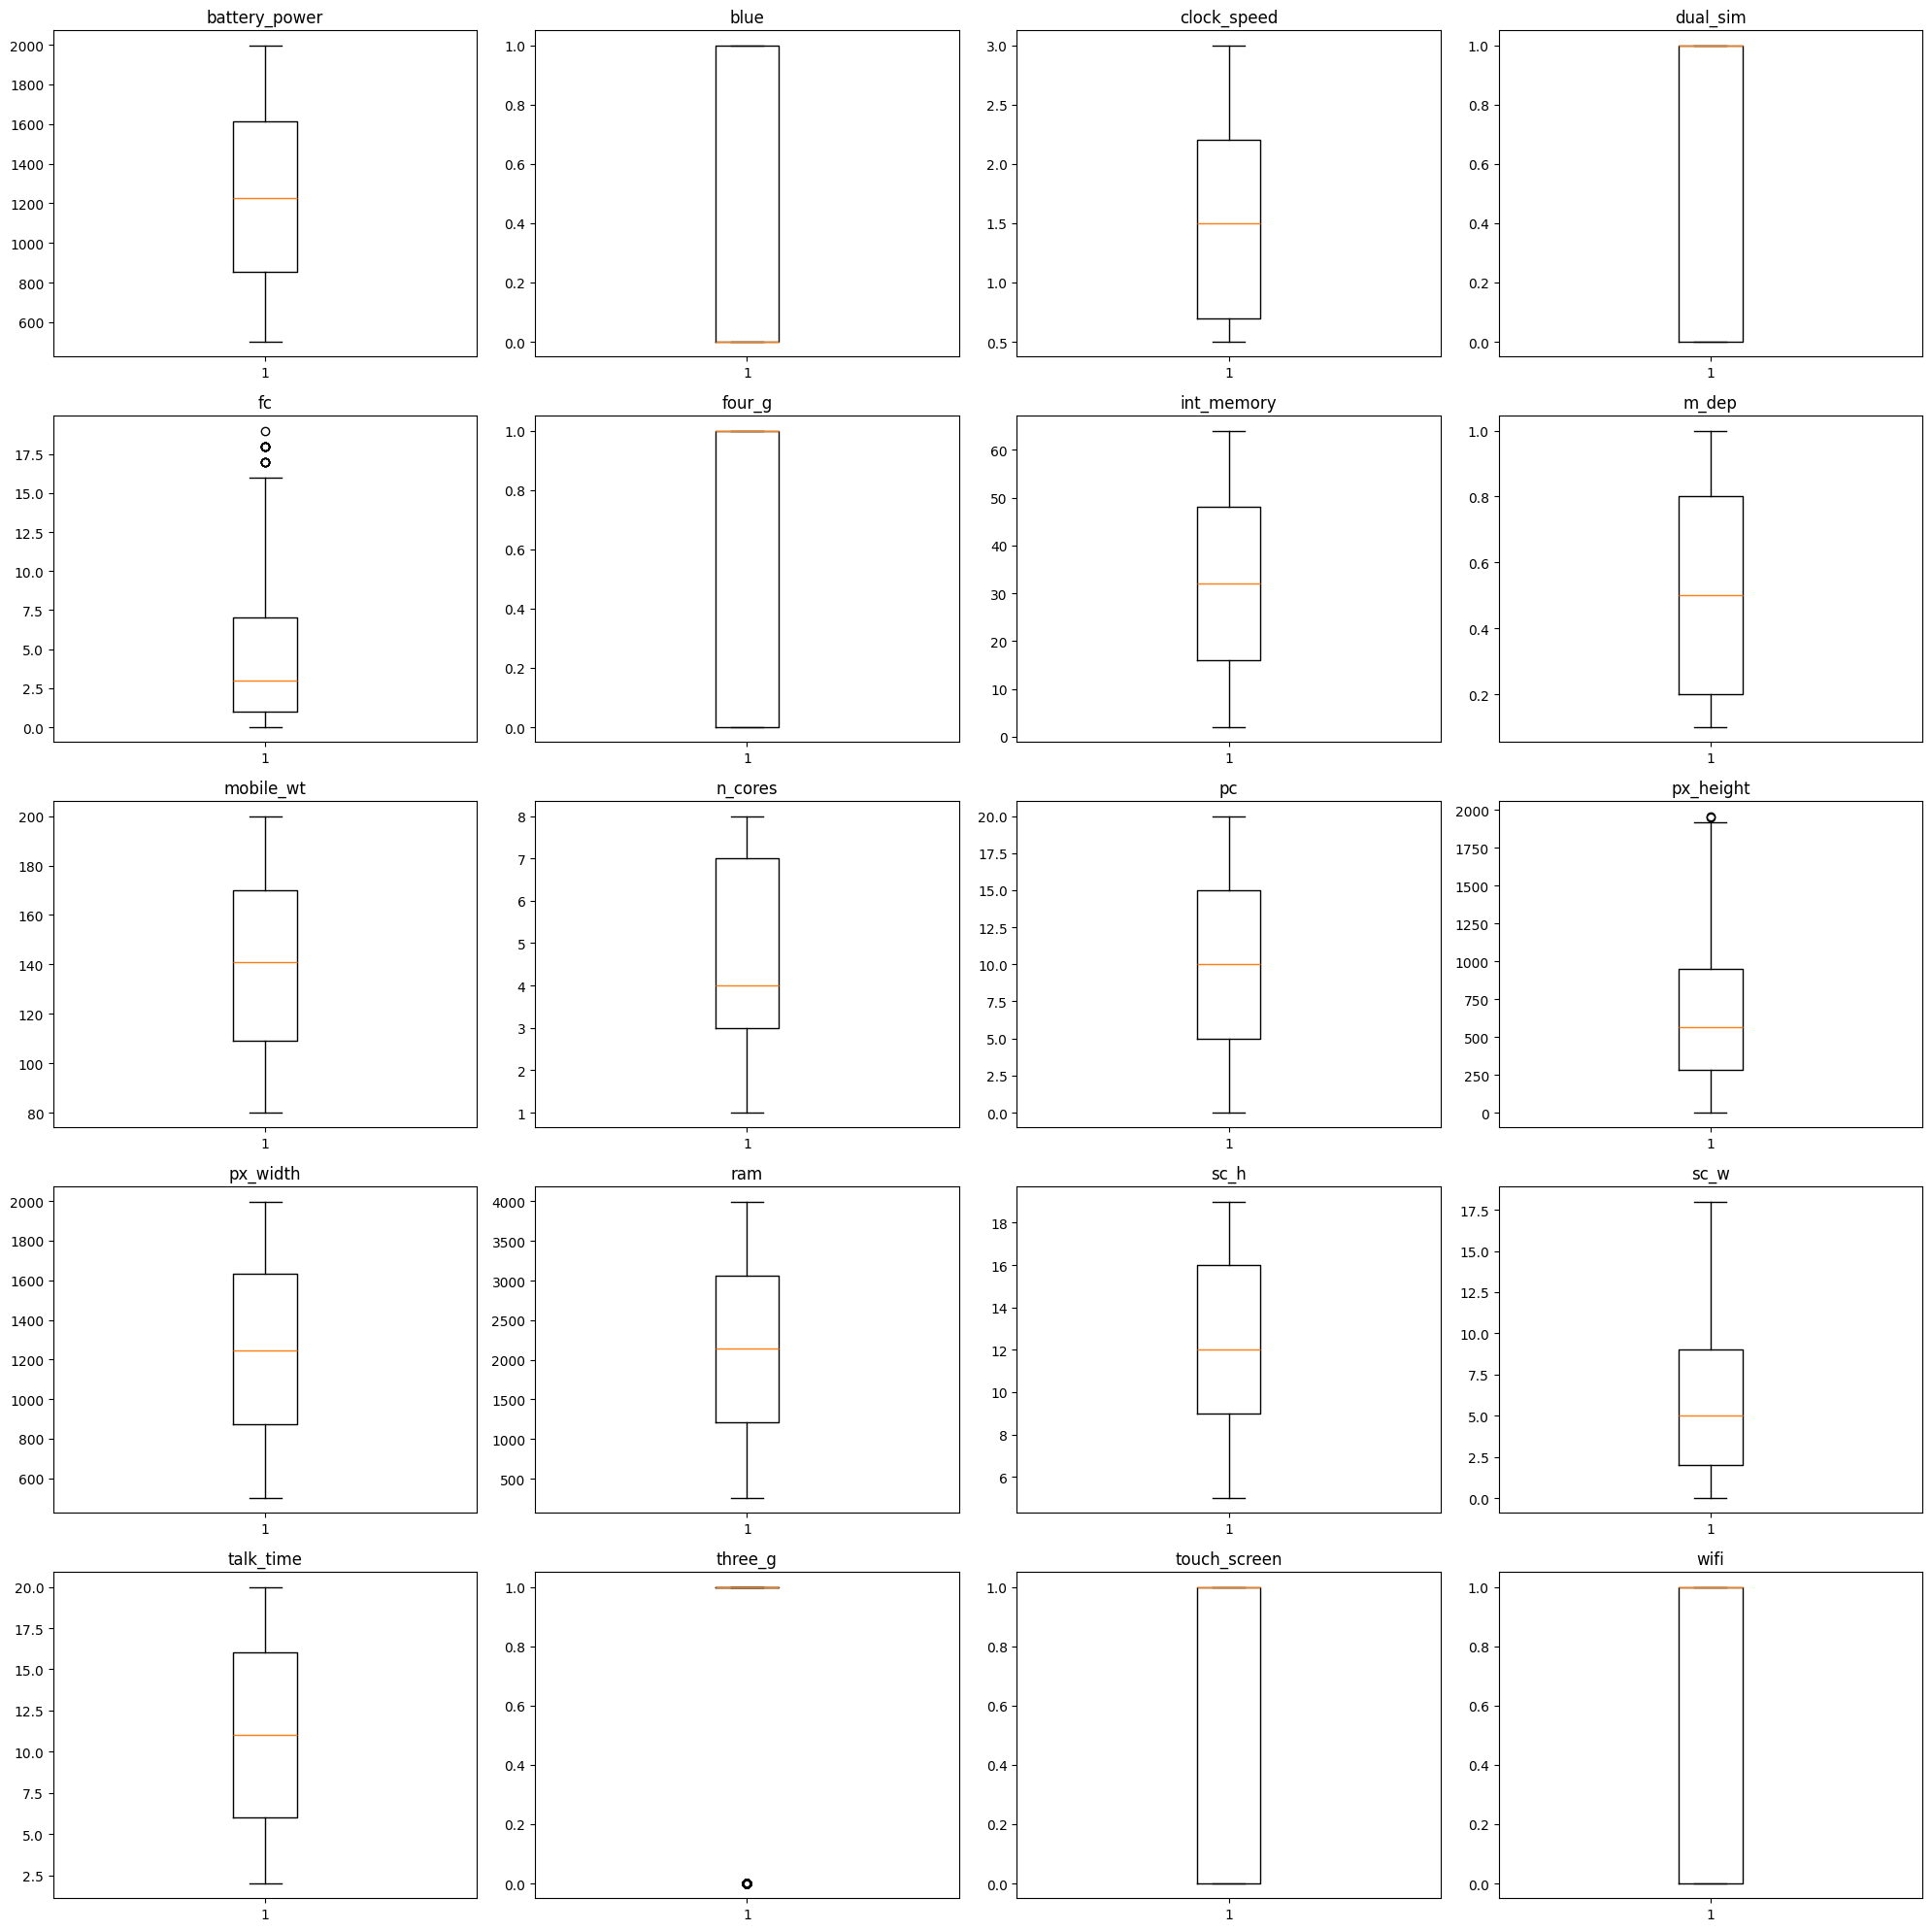

In [210]:
fig, axes = plt.subplots(nrows = 5, ncols = 4, figsize = (20, 20))
axes = axes.flatten()

for i in range(len(train_df.columns)-1):
    axes[i].boxplot(train_df.iloc[:, i])
    axes[i].set_title(train_df.columns[i])

plt.tight_layout()
plt.show()

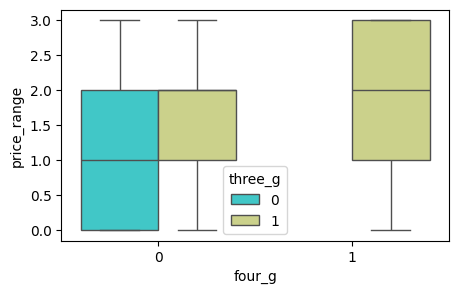

In [211]:
plt.figure(figsize = (5, 3))

sns.boxplot(train_df, x = 'four_g', y = 'price_range', palette = 'rainbow', hue = 'three_g')

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_24324\3889351280.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train_df, x = 'price_range', y = 'battery_power', palette = 'rainbow')


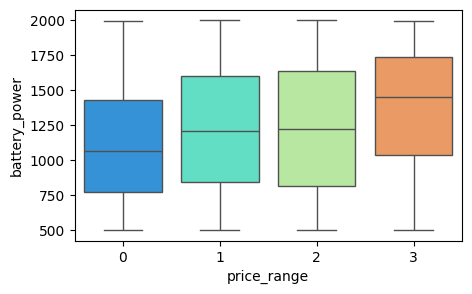

In [212]:
plt.figure(figsize = (5, 3))

sns.boxplot(train_df, x = 'price_range', y = 'battery_power', palette = 'rainbow')

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_24324\3560510635.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train_df, x = 'price_range', y = 'fc', palette = 'rainbow')


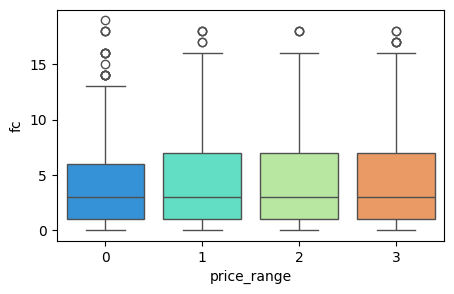

In [213]:
plt.figure(figsize = (5, 3))

sns.boxplot(train_df, x = 'price_range', y = 'fc', palette = 'rainbow')

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_24324\1017530528.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train_df, x = 'n_cores', y = 'price_range', palette = 'rainbow')


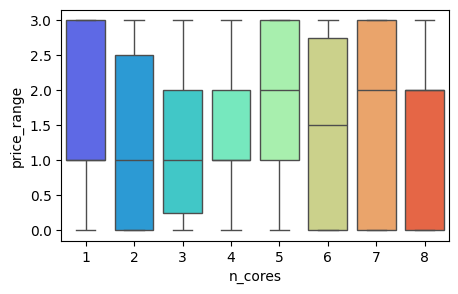

In [214]:
plt.figure(figsize = (5, 3))

sns.boxplot(train_df, x = 'n_cores', y = 'price_range', palette = 'rainbow')

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_24324\462752320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train_df, x = 'm_dep', y = 'price_range', palette = 'rainbow')


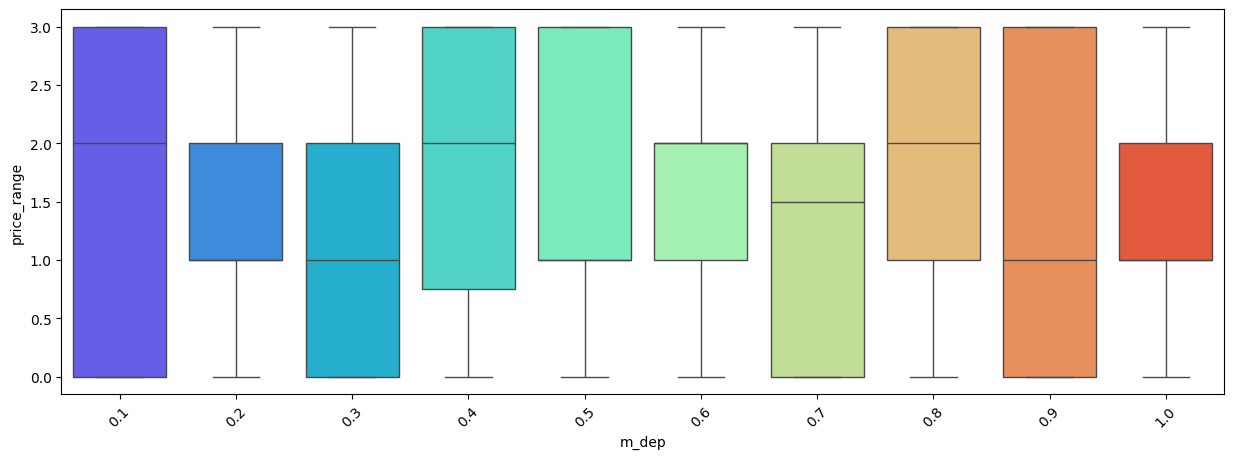

In [215]:
plt.figure(figsize = (15, 5))

sns.boxplot(train_df, x = 'm_dep', y = 'price_range', palette = 'rainbow')
plt.xticks(rotation = 45)

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_24324\49890364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train_df, x = 'touch_screen', y = 'price_range', palette = 'rainbow')


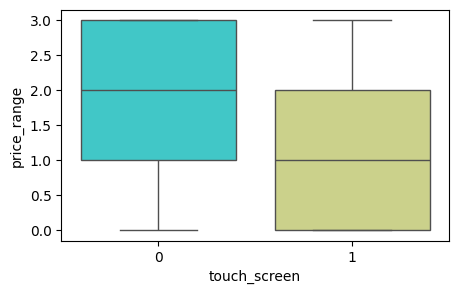

In [216]:
plt.figure(figsize = (5, 3))

sns.boxplot(train_df, x = 'touch_screen', y = 'price_range', palette = 'rainbow')

plt.show()

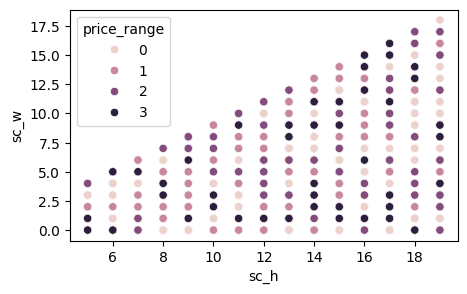

In [217]:
plt.figure(figsize = (5, 3))

sns.scatterplot(train_df, x = 'sc_h', y = 'sc_w', markers = 'o', hue = 'price_range')

plt.show()

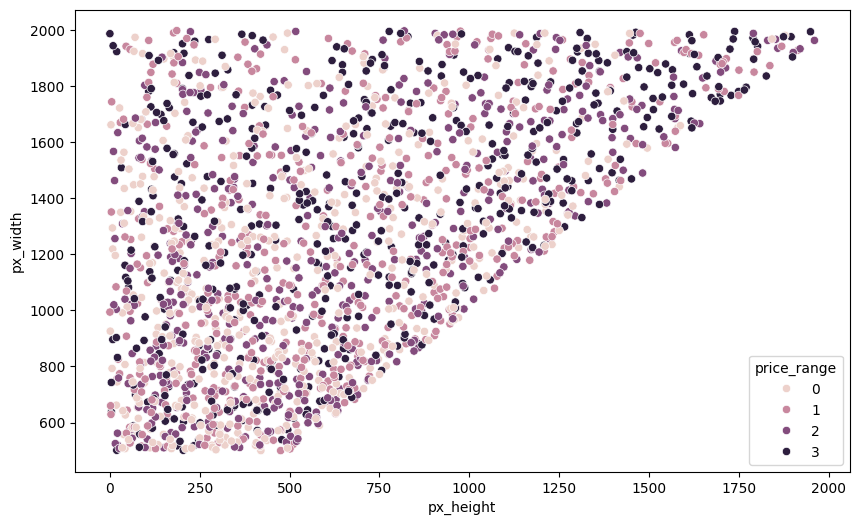

In [218]:
plt.figure(figsize = (10, 6))

sns.scatterplot(train_df, x = 'px_height', y = 'px_width', markers = 'o', hue = 'price_range')

plt.show()

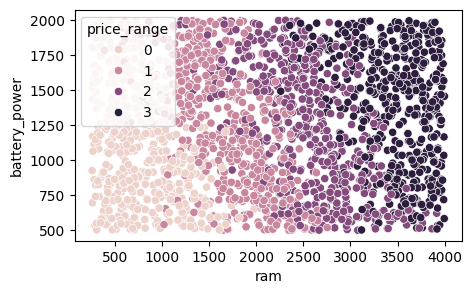

In [219]:
plt.figure(figsize = (5, 3))

sns.scatterplot(train_df, x = 'ram', y = 'battery_power', hue = 'price_range')

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_24324\2724304981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train_df, x = 'price_range', y = 'ram', palette = 'rainbow')


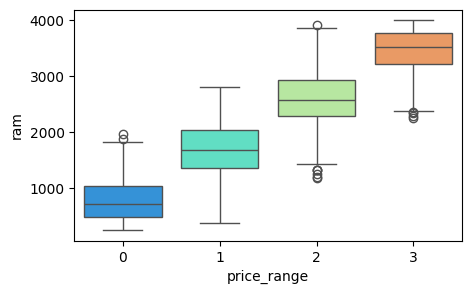

In [220]:
plt.figure(figsize = (5, 3))

sns.boxplot(train_df, x = 'price_range', y = 'ram', palette = 'rainbow')

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_24324\4005905813.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train_df, x = 'price_range', y = 'pc', palette = 'rainbow')


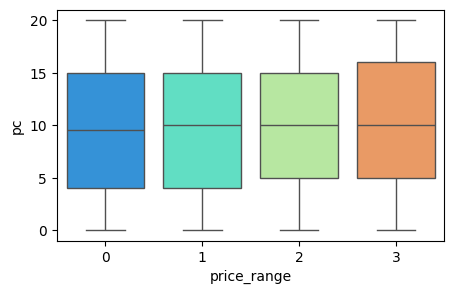

In [221]:
plt.figure(figsize = (5, 3))

sns.boxplot(train_df, x = 'price_range', y = 'pc', palette = 'rainbow')

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_24324\620811040.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train_df, x = 'price_range', y = 'clock_speed', palette = 'rainbow')


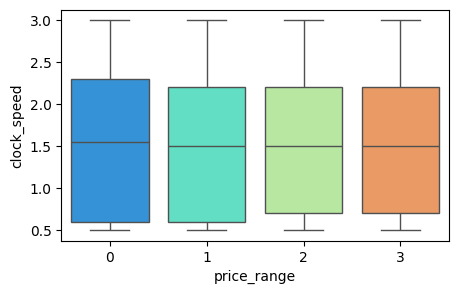

In [222]:
plt.figure(figsize = (5, 3))

sns.boxplot(train_df, x = 'price_range', y = 'clock_speed', palette = 'rainbow')

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_24324\1726215345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train_df, x = 'price_range', y = 'int_memory', palette = 'rainbow')


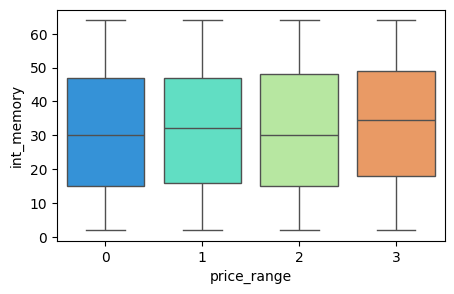

In [223]:
plt.figure(figsize = (5, 3))

sns.boxplot(train_df, x = 'price_range', y = 'int_memory', palette = 'rainbow')

plt.show()

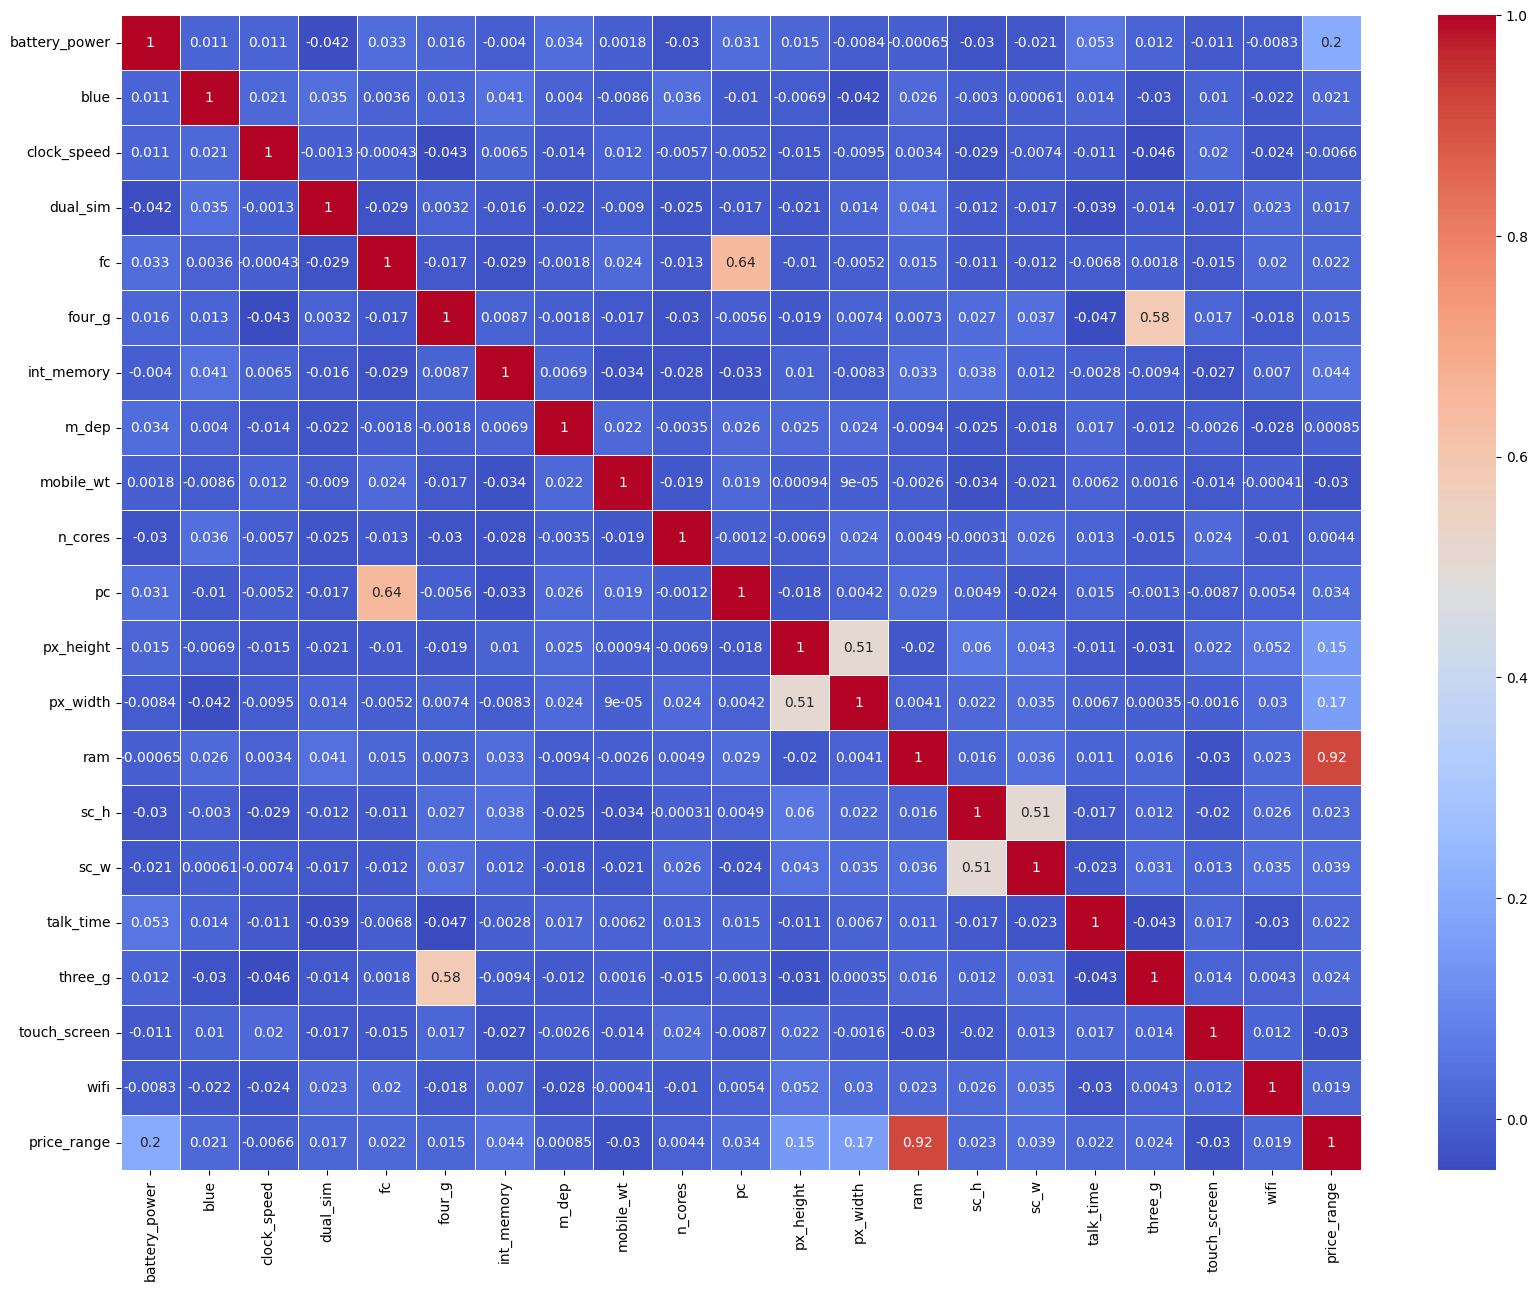

In [224]:
corr = train_df.corr()

plt.figure(figsize = (20, 15))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidths = 0.5)

plt.show()

# DATA SCALING

In [225]:
from sklearn.preprocessing import StandardScaler

In [226]:
standard_sc = StandardScaler()
standard_sc.fit(train_df[continues_columns])

train_df[continues_columns] = standard_sc.transform(train_df[continues_columns])
test_df[continues_columns] = standard_sc.transform(test_df[continues_columns])


In [227]:
train_final = pd.get_dummies(train_df, columns = discrete_columns, dtype = 'int', drop_first = True)
test_final = pd.get_dummies(test_df, columns = discrete_columns, dtype = 'int', drop_first = True)


In [228]:
train_final.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
       'talk_time', 'price_range', 'blue_1', 'dual_sim_1', 'four_g_1',
       'n_cores_2', 'n_cores_3', 'n_cores_4', 'n_cores_5', 'n_cores_6',
       'n_cores_7', 'n_cores_8', 'three_g_1', 'touch_screen_1', 'wifi_1'],
      dtype='object')

In [229]:
feature_names = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
                 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
                 'talk_time', 'blue_1', 'dual_sim_1', 'four_g_1',
                 'n_cores_2', 'n_cores_3', 'n_cores_4', 'n_cores_5', 'n_cores_6',
                 'n_cores_7', 'n_cores_8', 'three_g_1', 'touch_screen_1', 'wifi_1']

In [230]:
X = train_final[feature_names]
y = train_final['price_range']

In [231]:
X.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,...,n_cores_2,n_cores_3,n_cores_4,n_cores_5,n_cores_6,n_cores_7,n_cores_8,three_g_1,touch_screen_1,wifi_1
0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.305750,-1.408949,-1.146784,0.391703,...,1,0,0,0,0,0,0,0,0,1
1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.645989,0.585778,1.704465,0.467317,...,0,1,0,0,0,0,0,1,1,0
2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,-0.645989,1.392684,1.074968,0.441498,...,0,0,0,1,0,0,0,1,1,0
3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,-0.151168,1.286750,1.236971,0.594569,...,0,0,0,0,1,0,0,1,0,0
4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,0.673534,1.268718,-0.091452,-0.657666,...,1,0,0,0,0,0,0,1,1,0


# SAVE PREPROCESSED DATA

In [233]:
train_save_path = r'../preprocessed_data/preprocessed_train.csv'
test_save_path = r'../preprocessed_data/preprocessed_test.csv'

train_final.to_csv(train_save_path, index = False)
test_final.to_csv(test_save_path, index = False)
